In [1]:
import pandas as pd
train = pd.read_csv("./datasets/titanic/train.csv")
test = pd.read_csv("./datasets/titanic/test.csv")
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [2]:
train.shape

(891, 12)

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


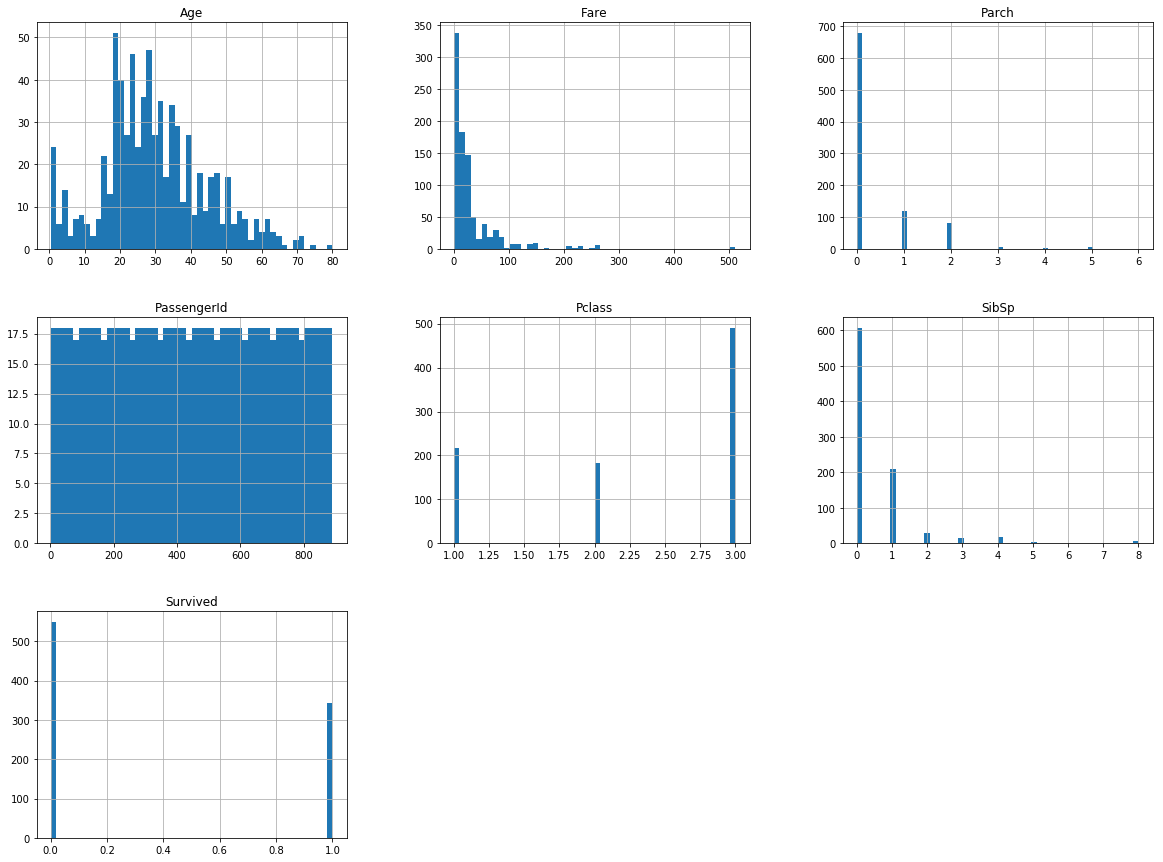

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20, 15))
plt.show()

In [5]:
import numpy as np
def split_train_test(data, testratio):
    shuffled_indeces = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_rario)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBDAF23978>,
      dtype=object)

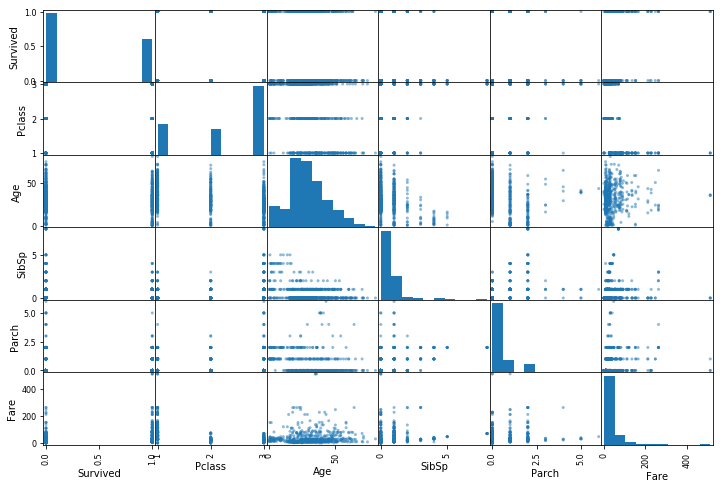

In [7]:
from pandas.plotting import scatter_matrix
attributes = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
scatter_matrix(train[attributes], figsize=(12, 8))

In [8]:
def kesson_table(df):
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    kesson_table = pd.concat([null_val, percent], axis=1)
    kesson_table_ren_columns = kesson_table.rename(
    columns={0: "欠損数", 1: "％"})
    return kesson_table_ren_columns
print(kesson_table(train))
print(kesson_table(test))

             欠損数          ％
PassengerId    0   0.000000
Survived       0   0.000000
Pclass         0   0.000000
Name           0   0.000000
Sex            0   0.000000
Age          177  19.865320
SibSp          0   0.000000
Parch          0   0.000000
Ticket         0   0.000000
Fare           0   0.000000
Cabin        687  77.104377
Embarked       2   0.224467
             欠損数          ％
PassengerId    0   0.000000
Pclass         0   0.000000
Name           0   0.000000
Sex            0   0.000000
Age           86  20.574163
SibSp          0   0.000000
Parch          0   0.000000
Ticket         0   0.000000
Fare           1   0.239234
Cabin        327  78.229665
Embarked       0   0.000000


In [9]:
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna('S')

In [14]:
train_num = train.drop("Name", axis=1).drop("Sex", axis=1).drop("Ticket", axis=1).drop("Cabin", axis=1).drop("Embarked", axis=1)
test_num = test.drop("Name", axis=1).drop("Sex", axis=1).drop("Ticket", axis=1).drop("Cabin", axis=1).drop("Embarked", axis=1)
train_num.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [11]:
from sklearn.preprocessing import OneHotEncoder
def toOnehot(df):
    encoder = OneHotEncoder()
    df_encoded, df_categories = df.factorize()
    df_onehot = encoder.fit_transform(df_encoded.reshape(-1, 1))
    print(df_onehot.toarray())
    return df_onehot

In [12]:
train_num["Sex"] = toOnehot(train["Sex"])
train_num["Ticket"] = toOnehot(train["Ticket"])
train_num["Embarked"] = toOnehot(train["Embarked"])

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


C:\Users\Yamagen\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Yamagen\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case yo

In [13]:
train_num.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex             object
Ticket          object
Embarked        object
dtype: object

In [15]:
test_num["Sex"] = toOnehot(train["Sex"])
test_num["Ticket"] = toOnehot(train["Ticket"])
test_num["Embarked"] = toOnehot(train["Embarked"])

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


C:\Users\Yamagen\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Yamagen\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case yo